<a href="https://colab.research.google.com/github/NurayVakitbilir/Vakitbilir_CNG562_HW1/blob/master/Vakitbilir_forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
data_url='http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv'
fires=pd.read_csv(data_url)

In [0]:
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                        (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),
                       (1,2,3,4,5,6,7), inplace=True)

In [0]:
#fires.area.replace((0),(1), inplace=True)
#fires_area = fires.area.apply(np.log)
#y = fires_area

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state =60)

In [0]:
X = fires.drop('area', axis=1)
y = fires.area
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 29)

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True).fit(X_train, y_train)
print('MSE as traning for Linear Regression:', mse(y_train, linreg.predict(X_train)))
print('MSE as test for Linear Regression:', mse(y_test, linreg.predict(X_test)))

MSE as traning for Linear Regression: 1.3694885894786637
MSE as test for Linear Regression: 0.08486023554734551


In [10]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor
tree = treereg(criterion='friedman_mse', splitter='best', max_depth=None, 
                min_samples_leaf=2, max_features=4,random_state=23, max_leaf_nodes=2, 
                min_impurity_split=0.0003, presort=True).fit(X_train, y_train)
print('MSE as for train decision tree:', mse(y_train, tree.predict(X_train)))
print('MSE as for test decision tree:', mse(y_test, tree.predict(X_test)))

MSE as for train decision tree: 1.3967483682200594
MSE as for test decision tree: 0.06008124470526529


In [11]:
tree.score(X_train, y_train)

0.010747586701038592

In [12]:
tree.score(X_test, y_test)

-1.2340162981551104

In [13]:
regressor = DecisionTreeRegressor(max_depth=0.5, max_leaf_nodes=18, random_state=100)
cross_val_score(regressor, X_scaled, y, cv=4)

array([ 0.        , -0.040791  , -0.03952981, -0.04562447])

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15, leaf_size=25, p=6).fit(X_train, y_train)
print('MSE as for train decision tree:', mse(y_train, knn.predict(X_train)))
print('MSE as for test decision tree:', mse(y_test, knn.predict(X_test)))

MSE as for train decision tree: 1.3614822026248186
MSE as for test decision tree: 0.146863022525921


In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=20)
tree_gs = treereg(max_depth=2,random_state=None, max_leaf_nodes=10)
results = cross_val_score(tree_gs, X, y, cv=kf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: -41.74%


In [16]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
parameters = {'n_neighbors': (1,2,3,5,10), 'leaf_size': (10, 20,30,40), 'p' : (2,4,5,7)}
gscv = GridSearchCV(estimator = knn, param_grid = parameters, n_jobs=-1, cv=5, )
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': (1, 2, 3, 5, 10), 'leaf_size': (10, 20, 30, 40), 'p': (2, 4, 5, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
gscv.best_params_

{'leaf_size': 20, 'n_neighbors': 10}

In [0]:
gscv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [0]:
gscv.score(X_test, y_test)

-7.256152979619783

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(y_test, gscv.predict(X_test))

-7.256152979619783

In [0]:
import matplotlib.pyplot as plt

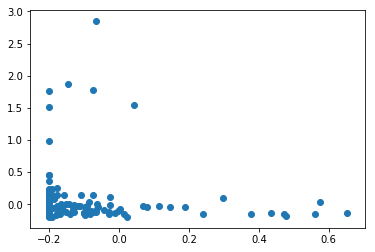

In [0]:
plt.scatter(y_test, gscv.predict(X_test))

In [0]:
y_test.mean()

-0.11780092642881097

In [0]:
gscv.predict(X_test).mean()

0.032543919424761945

In [0]:
gscv.score(X_train, y_train)

0.03327160726286793